In [1]:
import pandas as pd

In [11]:
df = pd.read_csv("C:/Users/user/Desktop/pizza_sales.csv")

In [51]:
import matplotlib.pyplot as plt

In [13]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


DATA CLEANING

In [15]:
# Check column types, missing values, and summary statistics
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB
None
           pizza_id      order_id      quantity    unit_price   total_price
count  48620.000000  48620.000000  48620.000000  48620.000000  48620.000000
mean   243

In [17]:
#check missing values

print(df.isnull().sum())

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64


In [27]:
# Convert order_date and order_time column to datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S', errors='coerce')

# Convert rest of the columns to appropriate types
df['quantity'] = df['quantity'].astype(int, errors='ignore')
df['unit_price'] = df['unit_price'].astype(float, errors='ignore')
df['total_price'] = df['total_price'].astype(float, errors='ignore')
df['pizza_id'] = df['pizza_id'].astype(int)
df['order_id'] = df['order_id'].astype(int)


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48620 non-null  int32         
 1   order_id           48620 non-null  int32         
 2   pizza_name_id      48620 non-null  object        
 3   quantity           48620 non-null  int32         
 4   order_date         19587 non-null  datetime64[ns]
 5   order_time         48620 non-null  datetime64[ns]
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](2), float64(2), int32(3), object(5)
memory usage: 3.9+ MB


In [31]:
#check for duplicates

duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [33]:
#find outliers
def find_outliers_z(data, threshold=3):
    z_scores = (data - data.mean()) / data.std()
    return data[abs(z_scores) > threshold]

#check outliers in the `quantity` column
outliers = find_outliers_z(df['quantity'])
print(f"Outliers in quantity:\n{outliers}")


Outliers in quantity:
48       2
183      3
211      2
222      2
245      2
        ..
48461    2
48466    3
48495    2
48575    2
48601    2
Name: quantity, Length: 927, dtype: int32


In [35]:
#remove extra spaces and convert to lowercase.
df['pizza_name'] = df['pizza_name'].str.lower().str.strip()
df['pizza_size'] = df['pizza_size'].str.lower().str.strip()
df['pizza_category'] = df['pizza_category'].str.lower().str.strip()

In [37]:
#drop column
df.drop(columns=['pizza_name_id'], inplace=True)

In [39]:
#save cleaned data

df.to_csv('pizza_sales_data.csv', index=False)

In [41]:
df.head()

,pizza_id,order_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,1,2015-01-01,1900-01-01 11:38:36,13.25,13.25,m,classic,"Sliced Ham, Pineapple, Mozzarella Cheese",the hawaiian pizza
1,2,2,1,2015-01-01,1900-01-01 11:57:40,16.00,16.00,m,classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",the classic deluxe pizza
2,3,2,1,2015-01-01,1900-01-01 11:57:40,18.50,18.50,l,veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",the five cheese pizza
3,4,2,1,2015-01-01,1900-01-01 11:57:40,20.75,20.75,l,supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",the italian supreme pizza
4,5,2,1,2015-01-01,1900-01-01 11:57:40,16.00,16.00,m,veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",the mexicana pizza


DATA ANALYSIS

In [49]:
#check the top selling pizzas

top_pizzas = df.groupby('pizza_name')['quantity'].sum().reset_index()

# Sort by quantity descending order
top_pizzas = top_pizzas.sort_values(by='quantity', ascending=False)

print(top_pizzas.head(10))  # Top 10 pizzas

                      pizza_name  quantity
7       the classic deluxe pizza      2453
0     the barbecue chicken pizza      2432
12            the hawaiian pizza      2422
20           the pepperoni pizza      2418
30        the thai chicken pizza      2371
4   the california chicken pizza      2370
23            the sicilian pizza      1938
26       the spicy italian pizza      1924
25   the southwest chicken pizza      1917
1             the big meat pizza      1914


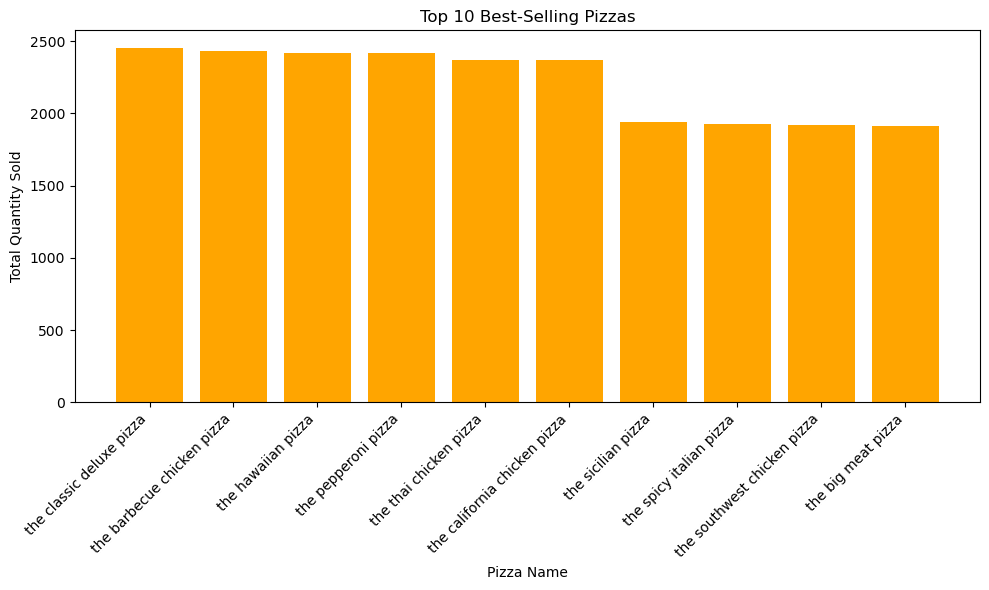

In [53]:
# Top 10 pizzas plot
plt.figure(figsize=(10, 6))
plt.bar(top_pizzas['pizza_name'][:10], top_pizzas['quantity'][:10], color='orange')
plt.title('Top 10 Best-Selling Pizzas')
plt.xlabel('Pizza Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [55]:
# Aggregate total quantity sold for each pizza category
category_sales = df.groupby('pizza_category')['quantity'].sum().reset_index()

# Sort by quantity in descending order to find the most popular categories
category_sales = category_sales.sort_values(by='quantity', ascending=False)

# print top popular categories
print(category_sales)


  pizza_category  quantity
1        classic     14888
2        supreme     11987
3         veggie     11649
0        chicken     11050


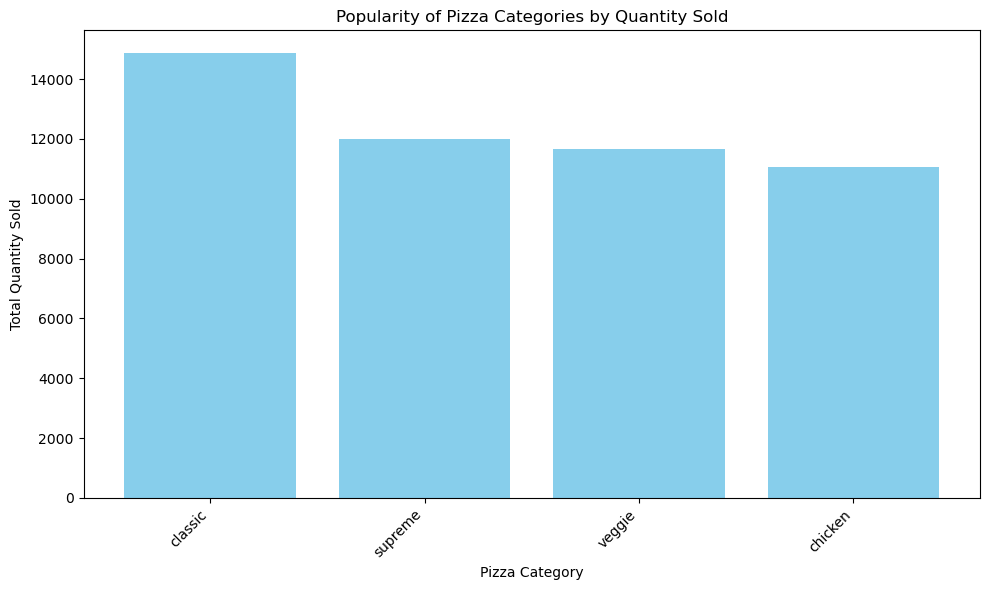

In [57]:


# Plot pizza categories by quantity sold
plt.figure(figsize=(10, 6))
plt.bar(category_sales['pizza_category'], category_sales['quantity'], color='skyblue')
plt.title('Popularity of Pizza Categories by Quantity Sold')
plt.xlabel('Pizza Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


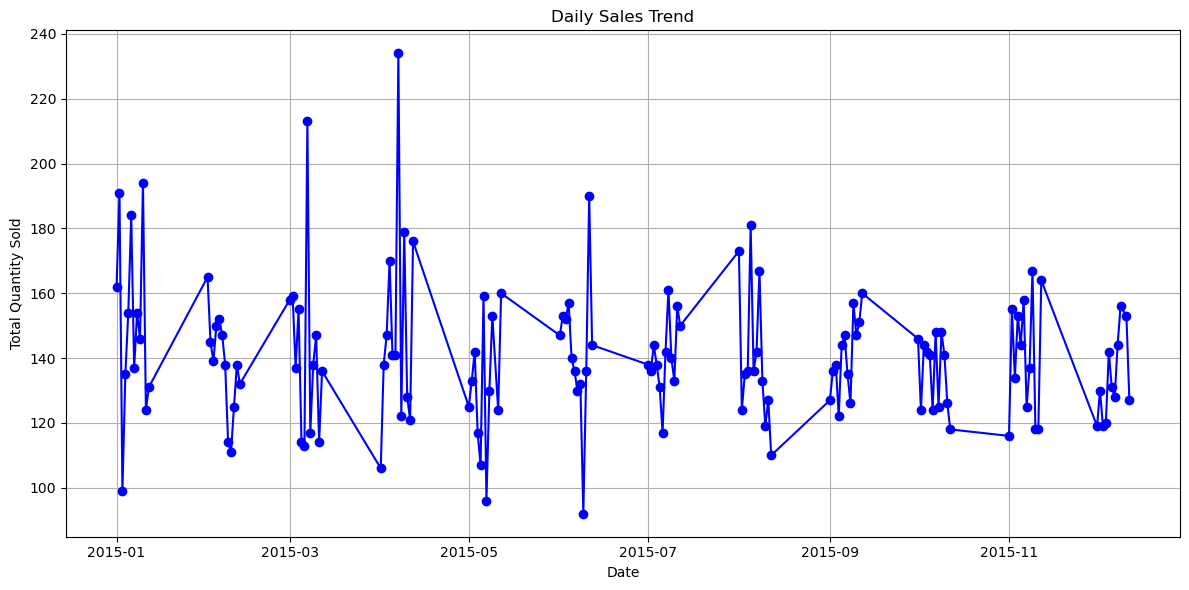

In [59]:
#analyze sales trend by day

# Group by order_date and sum the quantity for each day
daily_sales = df.groupby('order_date')['quantity'].sum().reset_index()

# Plot daily sales trend
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['order_date'], daily_sales['quantity'], marker='o', color='blue')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.tight_layout()
plt.show()


In [61]:
#revenue analysis

# Group by pizza_name and sum the total_price for each pizza
revenue_by_pizza = df.groupby('pizza_name')['total_price'].sum().reset_index()

# Sort the data in descending order to find the highest revenue-generating pizzas
revenue_by_pizza = revenue_by_pizza.sort_values(by='total_price', ascending=False).reset_index(drop=True)

# print top 10 pizzas by revenue
top_revenue_pizzas = revenue_by_pizza.head(10)
print(top_revenue_pizzas)


                     pizza_name  total_price
0        the thai chicken pizza     43434.25
1    the barbecue chicken pizza     42768.00
2  the california chicken pizza     41409.50
3      the classic deluxe pizza     38180.50
4       the spicy italian pizza     34831.25
5   the southwest chicken pizza     34705.75
6     the italian supreme pizza     33476.75
7            the hawaiian pizza     32273.25
8         the four cheese pizza     32265.70
9            the sicilian pizza     30940.50


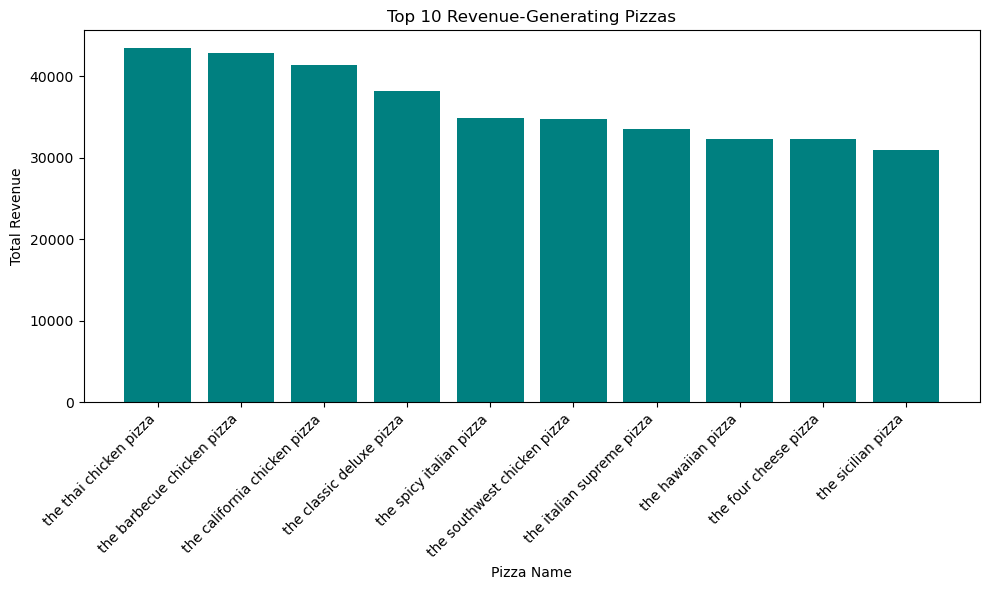

In [63]:


# Plotting the top revenue-generating pizzas
plt.figure(figsize=(10, 6))
plt.bar(top_revenue_pizzas['pizza_name'], top_revenue_pizzas['total_price'], color='teal')
plt.title('Top 10 Revenue-Generating Pizzas')
plt.xlabel('Pizza Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


thai chicken pizza followed by barbecue chicken pizza appears to be best sellers in terms of revenue. with this analysis the business can focus on promoting this high revenue pizzas to boost sales. there is need to adjust market for the less popular pizzas.